In [62]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [63]:
df = pd.read_csv(r"C:\Users\vostr\Desktop\churn1\TelcoCustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df.shape

(7043, 21)

In [65]:
df.drop('customerID',axis='columns',inplace = True)

In [66]:
df.shape

(7043, 20)

In [67]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [68]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [69]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [70]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [71]:
df1 = df[df.TotalCharges!= ' ']
df1.shape

(7032, 20)

In [72]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [73]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\vostr\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [74]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

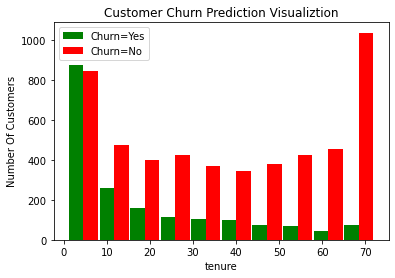

In [75]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

#blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
#blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

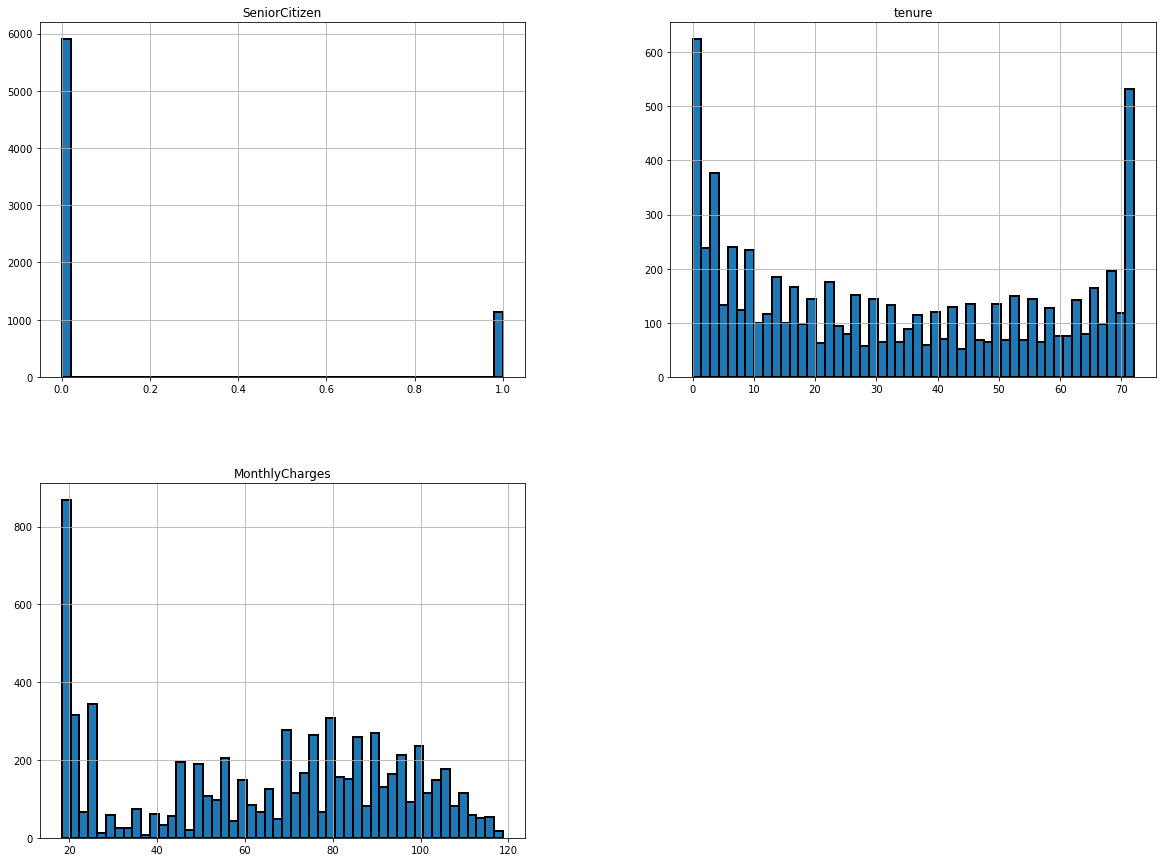

In [76]:
df.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

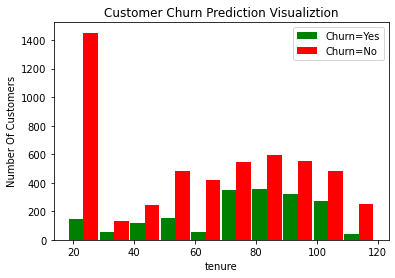

In [77]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges	

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

#blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
#lood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [78]:
for cl in df1:
    if df1[cl].dtypes == 'object':
        print(f'{cl}: {df1[cl].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [79]:
df1.replace('No internet service','No',inplace= True)
df1.replace('No phone service','No',inplace= True)

C:\Users\vostr\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [80]:
for cl in df1:
    if df1[cl].dtypes == 'object':
        print(f'{cl}: {df1[cl].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [81]:
for cl in df1:
    df1[cl].replace({'Yes':1,'No':0},inplace = True)

C:\Users\vostr\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [82]:
for cl in df1:
    print(f'{cl}: {df1[cl].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [83]:
df1['gender'].replace({'Female':1,'Male':0},inplace = True)

In [84]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [85]:
df2 = pd.get_dummies(data = df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [86]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [87]:
scallling = ['tenure','MonthlyCharges','TotalCharges']

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [89]:
df2[scallling] = scaler.fit_transform(df2[scallling])

In [90]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [91]:
X = df2.drop('Churn',axis = 'columns')
y = testLabels= df2.Churn.astype(np.float32)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [93]:
#y_train.value_counts()

In [94]:
#y.value_counts()

In [95]:
#X_train.shape

In [96]:

#import tensorflow as tf
#from tensorflow import keras


#model = keras.Sequential([
#    keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
#    keras.layers.Dense(20,activation = 'relu'),
#    keras.layers.Dense(20,activation = 'softsign'),
#    keras.layers.Dense(20,activation = 'softmax'),
#    keras.layers.Dense(20,activation = 'selu'),
#    keras.layers.Dense(1,activation = 'sigmoid'),
#]) 

#model.compile(
#    optimizer = 'adam',
#    loss = 'binary_crossentropy',
#    metrics = ['accuracy'])

#model.fit(X_train,y_train,epochs = 5)


In [97]:
#model.evaluate(X_test,y_test)

In [98]:
#yp = model.predict(X_test)

In [99]:

#y_pred = []
#for ele in yp:
#    if ele>0.5:
#       y_pred.append(1)
#    else:
#        y_pred.append(0)


In [100]:
#y_pred[:5]

In [101]:
#y_test[:5]

In [102]:

#import seaborn as sn
#cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True, fmt='d')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')


In [103]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [104]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
        keras.layers.Dense(20,activation = 'relu'),
        keras.layers.Dense(20,activation = 'softsign'),
        keras.layers.Dense(20,activation = 'softmax'),
        keras.layers.Dense(20,activation = 'selu'),
        keras.layers.Dense(1,activation = 'sigmoid'),
    ]) 

    model.compile(
        optimizer = 'adam',
        loss = loss,
        metrics = ['accuracy'])

    if weights == -1:
        model.fit(X_train,y_train,epochs = 100)
    else:
        model.fit(X_train,y_train,epochs = 100,class_weight = weights)

    print(model.evaluate(X_test,y_test))

    yp = model.predict(X_test)
    yp = np.round(yp)

    print('Classification Report \n',classification_report(y_test,yp))

    return yp

In [105]:
#yp = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

In [106]:
###########################################U#####ndersampling##################################################################

In [107]:
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [108]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [109]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [110]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6271
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7482
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7502
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7605
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7706
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7779
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8395
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8458
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8445
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8445
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8465
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8441
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8498
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8428
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8515
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8405
Epoch 93/100


In [111]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [112]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [114]:
yp = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5778 - accuracy: 0.7229
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4813 - accuracy: 0.7757
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7777
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7832
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.7878
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4508 - accuracy: 0.7860
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.7937
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.7921
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.7959
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4302 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8610
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8569
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8567
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8558
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8621
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8562
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8617
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8604
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8613
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3299 - accuracy: 

In [115]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [117]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

y_sm.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [118]:
yp = ANN(X_sm, y_sm, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5708 - accuracy: 0.7068
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4796 - accuracy: 0.7766
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.7765
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.7786
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.7844
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.7826
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4429 - accuracy: 0.7887
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7916
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7950
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4296 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8599
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8591
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8588
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8582
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8605
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8605
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8602
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8604
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8571
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 